In [1]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
test_x_y = pd.read_csv('test_links_class_similarities_2505.csv')

In [58]:
test_x_y[test_x_y['citing'] == 'W14-1304']

,citing,cited,class,sim_d2v,sim_tfidf,sim_ft_mean,sim_ft_weighted,wmd
2904,W14-1304,W11-0705,1,0.754004,0.021915,0.832334,0.789251,1.007812
4040,W14-1304,S12-1033,1,0.684599,0.278297,0.934051,0.929372,0.703222
4090,W14-1304,S13-2103,0,0.612967,0.004720,0.801367,0.729238,0.775527
17643,W14-1304,W03-1301,0,0.576382,0.007299,0.836016,0.772111,0.584559
20106,W14-1304,P11-2102,1,0.608081,0.053375,0.884539,0.844853,0.653098


In [22]:
test_x_y[test_x_y['citing'] == 'W14-1304']

,citing,cited,class,sim_tfidf,sim_ft_mean,sim_ft_weighted,wmd
2904,W14-1304,W11-0705,1,0.021915,0.832334,0.789251,1.007812
4040,W14-1304,S12-1033,1,0.278297,0.934051,0.929372,0.703222
4090,W14-1304,S13-2103,0,0.004720,0.801367,0.729238,0.775527
17643,W14-1304,W03-1301,0,0.007299,0.836016,0.772111,0.584559
20106,W14-1304,P11-2102,1,0.053375,0.884539,0.844853,0.653098


In [21]:
test_x_y[test_x_y['cited'] == 'W14-1304']

,citing,cited,class,sim_tfidf,sim_ft_mean,sim_ft_weighted,wmd
2,D13-1041,W14-1304,0,0.011548,0.867591,0.818291,0.650556
4225,P13-1143,W14-1304,0,0.005982,0.797621,0.728486,0.953266


In [13]:
def print_stat(col, df):
    print('max neg: ',df[df['class'] == 0][col].max())
    print('max pos: ',df[df['class'] == 1][col].max())
    print('mean neg: ',df[df['class'] == 0][col].mean())
    print('mean pos: ',df[df['class'] == 1][col].mean())
    print('min neg: ',df[df['class'] == 0][col].min())
    print('min pos: ',df[df['class'] == 1][col].min())

In [14]:
print_stat('sim_tfidf', test_x_y)

max neg:  0.3126740363891101
max pos:  1.0000000000000002
mean neg:  0.029005514850992713
mean pos:  0.1207099143926098
min neg:  0.0
min pos:  0.0


In [15]:
print_stat('sim_ft_mean', test_x_y)

max neg:  0.960478166740966
max pos:  1.0000000000000004
mean neg:  0.8848889648996194
mean pos:  0.9106230438569021
min neg:  0.5961177005663543
min pos:  0.7313475799192806


In [16]:
print_stat('sim_ft_weighted', test_x_y)

max neg:  0.9562926400187136
max pos:  1.0000000000000004
mean neg:  0.8611485185364427
mean pos:  0.8908586768142386
min neg:  0.5434696145883092
min pos:  0.6207053057346779


In [23]:
print_stat('wmd', test_x_y)

max neg:  1.8882284424622315
max pos:  1.32364617616696
mean neg:  0.6046992590197461
mean pos:  0.5546026097937531
min neg:  0.21120697425291585
min pos:  0.0


In [88]:
def plot_hist_classes(df, col, xlabel, ylabel, titles, filename):  
    f,a = plt.subplots(1,2,figsize=(10,4))
    a = a.ravel()
    for idx,ax in enumerate(a):
        class_label = idx%2
        data = df[df['class'] == class_label][col]
        ax.hist(data, normed=True, bins=20)
        ax.set_title(titles[class_label])
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
    plt.tight_layout()
    plt.savefig(filename)

In [40]:
# xs = ['Similarity (TF-IDF)','Similarity (Mean FT)','Similarity (Weighted FT)','WMD']
ys = 'Count'
titles = ['Negative','Positive'] 
# col = 'sim_tfidf'

c:\programdata\anaconda3\envs\mlenv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


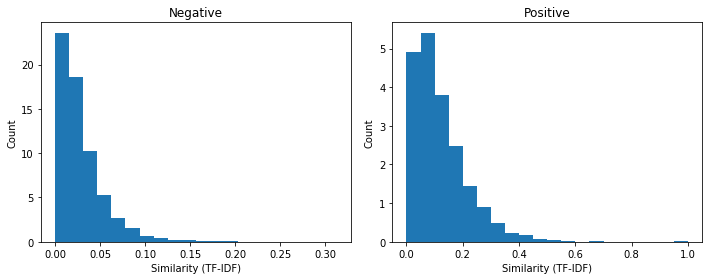

In [89]:
plot_hist_classes(test_x_y, 'sim_tfidf', 'Similarity (TF-IDF)', ys, titles, 'tfidf_sim.png')

In [ ]:
# tfidf threshold = 0.05 -> Positive

c:\programdata\anaconda3\envs\mlenv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


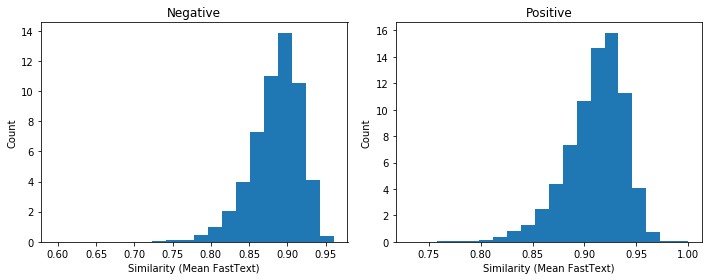

In [90]:
plot_hist_classes(test_x_y, 'sim_ft_mean', 'Similarity (Mean FastText)', ys, titles,'sim_ft_mean.png')

In [ ]:
# ft mean threshold = 0.88

c:\programdata\anaconda3\envs\mlenv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


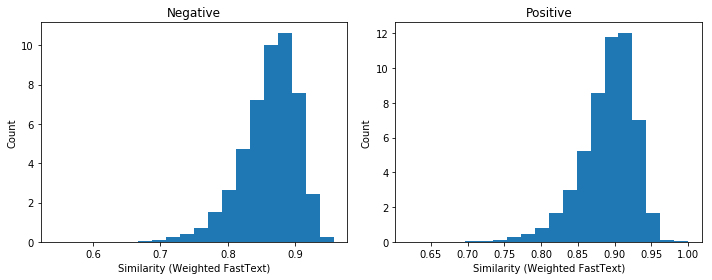

In [99]:
plot_hist_classes(test_x_y, 'sim_ft_weighted', 'Similarity (Weighted FastText)', ys, titles,'sim_ft_weighted.png')

In [ ]:
# ft weighted threshold 0.88

c:\programdata\anaconda3\envs\mlenv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


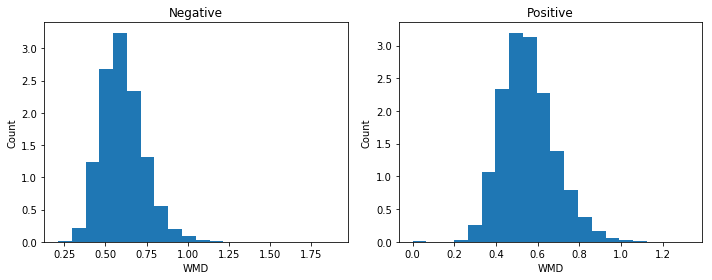

In [92]:
plot_hist_classes(test_x_y, 'wmd', 'WMD', ys, titles,'wmd.png')

In [95]:
test_x_y['wmd_sim'] = test_x_y['wmd'].apply(lambda x: 1/(x+1))

In [96]:
test_x_y.head(10)

,Unnamed: 0,citing,cited,class,sim_d2v,sim_tfidf,sim_ft_mean,sim_ft_weighted,wmd,wmd_sim
0,0,C14-1216,W07-1019,0,0.426718,0.004421,0.853234,0.785374,0.642577,0.608800
1,1,W13-2002,D08-1027,0,0.516183,0.029428,0.870538,0.838423,0.586771,0.630211
2,2,D13-1041,W14-1304,0,0.567861,0.011548,0.867591,0.818291,0.650556,0.605856
3,3,P14-2095,P13-2017,1,0.549364,0.133643,0.870482,0.854460,0.652218,0.605247
4,4,C14-1089,W04-3217,0,0.607326,0.025127,0.895686,0.848893,0.756907,0.569182
5,5,D14-1220,W10-4327,1,0.556891,0.242829,0.930688,0.921227,0.423930,0.702282
6,6,S13-2038,P13-1045,0,0.722981,0.000000,0.905484,0.899809,0.447378,0.690904
7,7,D13-1116,P12-1046,1,0.675681,0.045418,0.924088,0.883340,0.322961,0.755880
8,8,P14-1036,D10-1077,0,0.549989,0.035893,0.929874,0.920142,0.449794,0.689753
9,9,C14-1030,W09-1412,0,0.560475,0.044558,0.909203,0.894026,0.444028,0.692507


c:\programdata\anaconda3\envs\mlenv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


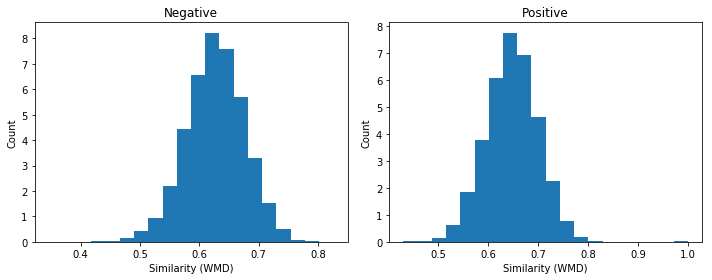

In [97]:
plot_hist_classes(test_x_y, 'wmd_sim', 'Similarity (WMD)', ys, titles,'wmd_sim.png')

In [ ]:
# wmd_sim 0.65

In [60]:
test_x_y.head()

,citing,cited,class,sim_d2v,sim_tfidf,sim_ft_mean,sim_ft_weighted,wmd
0,C14-1216,W07-1019,0,0.454362,0.004421,0.853234,0.785374,0.642577
1,W13-2002,D08-1027,0,0.547518,0.029428,0.870538,0.838423,0.586771
2,D13-1041,W14-1304,0,0.604749,0.011548,0.867591,0.818291,0.650556
3,P14-2095,P13-2017,1,0.260585,0.133643,0.870482,0.854460,0.652218
4,C14-1089,W04-3217,0,0.505673,0.025127,0.895686,0.848893,0.756907


c:\programdata\anaconda3\envs\mlenv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


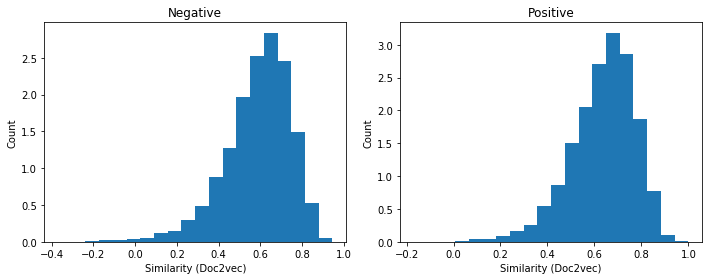

In [98]:
plot_hist_classes(test_x_y, 'sim_d2v', 'Similarity (Doc2vec)', ys, titles,'d2v.png')

In [64]:
test_x_y['tfidf_label'] = test_x_y['sim_tfidf'].apply(lambda x: 1 if x > 0.05 else 0)

In [79]:
test_x_y['ft_mean_label'] = test_x_y['sim_ft_mean'].apply(lambda x: 1 if x > 0.89 else 0)
test_x_y['ft_weight_label'] = test_x_y['sim_ft_weighted'].apply(lambda x: 1 if x > 0.89 else 0)
test_x_y['wmd_label'] = test_x_y['wmd_sim'].apply(lambda x: 1 if x > 0.65 else 0)

In [68]:
def print_class_metrics(y_test, y_pred_test):
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    f1_macro_test = f1_score(y_test, y_pred_test, average='macro')
    f1_micro_test = f1_score(y_test, y_pred_test, average='micro')
    logloss_test = log_loss(y_test, y_pred_test)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print('Precision: ' + str(precision_test))
    print('Recall: ' + str(recall_test))
    print('Accuracy: ' + str(accuracy_test))
    print('F1-macro: ' + str(f1_macro_test))
    print('F1-micro: ' + str(f1_micro_test))
    print('Logloss: ' + str(logloss_test))
    print('ROC-AUC: ' + str(roc_auc_test))

In [80]:
test_x_y.head()

,citing,cited,class,sim_d2v,sim_tfidf,sim_ft_mean,sim_ft_weighted,wmd,wmd_sim,tfidf_label,ft_mean_label,ft_weight_label,wmd_label
0,C14-1216,W07-1019,0,0.454362,0.004421,0.853234,0.785374,0.642577,0.608800,0,0,0,0
1,W13-2002,D08-1027,0,0.547518,0.029428,0.870538,0.838423,0.586771,0.630211,0,0,0,0
2,D13-1041,W14-1304,0,0.604749,0.011548,0.867591,0.818291,0.650556,0.605856,0,0,0,0
3,P14-2095,P13-2017,1,0.260585,0.133643,0.870482,0.854460,0.652218,0.605247,1,0,0,0
4,C14-1089,W04-3217,0,0.505673,0.025127,0.895686,0.848893,0.756907,0.569182,0,1,0,0


In [71]:
print_class_metrics(test_x_y['class'], test_x_y['tfidf_label'])

Precision: 0.8272561967652406
Recall: 0.7549344978165939
Accuracy: 0.798646288209607
F1-macro: 0.7982608210005595
F1-micro: 0.798646288209607
Logloss: 6.954573852851295
ROC-AUC: 0.798646288209607


In [81]:
print_class_metrics(test_x_y['class'], test_x_y['ft_mean_label'])

Precision: 0.615608896121508
Recall: 0.7929257641921398
Accuracy: 0.6489082969432315
F1-macro: 0.6414720578258393
F1-micro: 0.6489082969432315
Logloss: 12.126475769996231
ROC-AUC: 0.6489082969432314


In [82]:
print_class_metrics(test_x_y['class'], test_x_y['ft_weight_label'])

Precision: 0.6939569101418812
Recall: 0.5766812227074236
Accuracy: 0.6611790393013101
F1-macro: 0.6587425013675999
F1-micro: 0.6611790393013101
Logloss: 11.702563077547106
ROC-AUC: 0.6611790393013101


In [74]:
print_class_metrics(test_x_y['class'], test_x_y['wmd_label'])

Precision: 0.6025100075732988
Recall: 0.48637554585152837
Accuracy: 0.5827510917030567
F1-macro: 0.5788392470926604
F1-micro: 0.5827510917030567
Logloss: 14.411395029446728
ROC-AUC: 0.5827510917030567
